In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


## BUSINESS UNDERSTANDING

## Project Name:- Stroke Prediction Dataset

* This dataset is used to predict the likelihood of a patient experience stroke based on input parameters such as age,gender,various medical condition and smoking status

In [2]:
# import libraries
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [3]:
# chose file path
file_path = "/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv"
# load the dataset
stroke_data = pd.read_csv(file_path)
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Rename columns if required
stroke_data.rename(columns = {'ever_married':'Marital_status', 'work_type':'Profession','Residence_type':'Residence_status',},inplace = True)
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,Marital_status,Profession,Residence_status,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   Marital_status     5110 non-null   object 
 6   Profession         5110 non-null   object 
 7   Residence_status   5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Column Explanation

1. id- Unique Identification.
2. gender- Showing the gender of a patient (Male,Female and Others).
3. age - Age of patient's.
4. hypertension - 0 shows patient has no hyper tension 1 shows patient has patient has hypertension.
5. heart_disease - 0 shows patient has no heart disease and 1 shows patient has heart disease.
6. Marital_status - It shows the patient's are married or not.
7. Profession - the patient's profession.
8. Residence_status - Where the patient lived.
9. avg_glucose_level - Glucose level in the blood.
10. bmi - Body mass index.
11. smoking status - if the person is smoked or not.
12. stroke - 1 shows the patient had a stroke and 0 is the patient had not a stroke.

In [7]:
# Converting age data type
stroke_data['age']=stroke_data['age'].astype('int64')

In [8]:
# it show how many rows and columns are present in the dataset.
stroke_data.shape

(5110, 12)

In [9]:
# check data types
stroke_data.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
Marital_status        object
Profession            object
Residence_status      object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
# Print first five rows
stroke_data.head()

,id,gender,age,hypertension,heart_disease,Marital_status,Profession,Residence_status,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
# Print last five rows
stroke_data.tail()

,id,gender,age,hypertension,heart_disease,Marital_status,Profession,Residence_status,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [12]:
# information about the data set
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   Marital_status     5110 non-null   object 
 6   Profession         5110 non-null   object 
 7   Residence_status   5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


## Handling Missing data

In [13]:
# checking missing data in our dataset
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
Marital_status         0
Profession             0
Residence_status       0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: xlabel='bmi', ylabel='Count'>

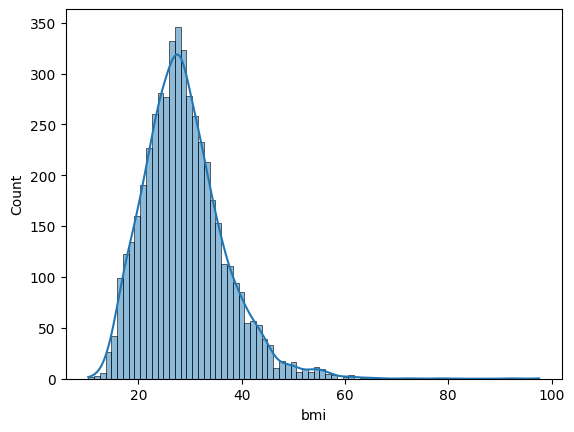

In [14]:
# Checking distribution of bmi for determining the fill na startegy
sns.histplot(data=stroke_data,x='bmi',kde=True)
#this code will create a histogram plot of the 'bmi' variable from the stroke_data dataset, with a KDE overlaid on top to show the estimated probability density function of the BMI values.

<Axes: >

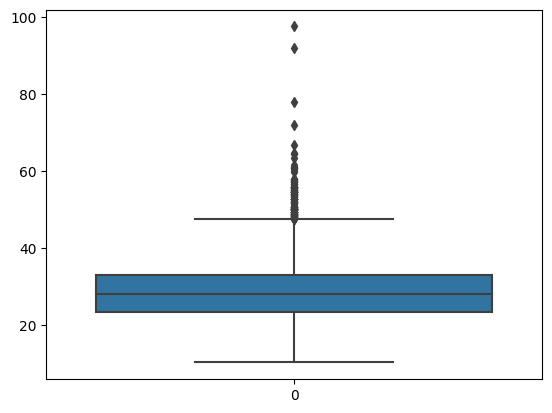

In [15]:
# showing the outliers
sns.boxplot(stroke_data['bmi'])

In [16]:
# filling the missing value with mean value
stroke_data['bmi'].fillna(stroke_data['bmi'].median(),inplace=True)

In [17]:
# check the dataset after filling the missing value 
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
Marital_status       0
Profession           0
Residence_status     0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

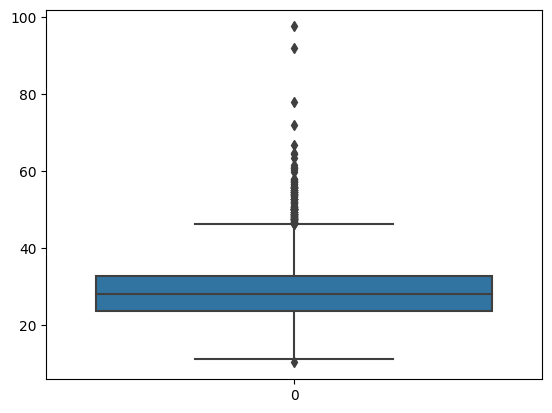

In [18]:
sns.boxplot(stroke_data['bmi'])

After filling the values there is no missing values. That mean the dataset is clean now.

## EDA (Exploratory Data Analysis)


Summary statistics

In [19]:
# Describe the numerical data
stroke_data.describe(include='number')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
# Describe the catagorical data
stroke_data.describe(include='object')

,gender,Marital_status,Profession,Residence_status,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [21]:
# Class distribution
display(stroke_data[['Profession','gender']].value_counts())

Profession     gender
Private        Female    1754
               Male      1170
Self-employed  Female     504
Govt_job       Female     399
children       Male       361
               Female     326
Self-employed  Male       315
Govt_job       Male       258
Never_worked   Female      11
               Male        11
Private        Other        1
Name: count, dtype: int64

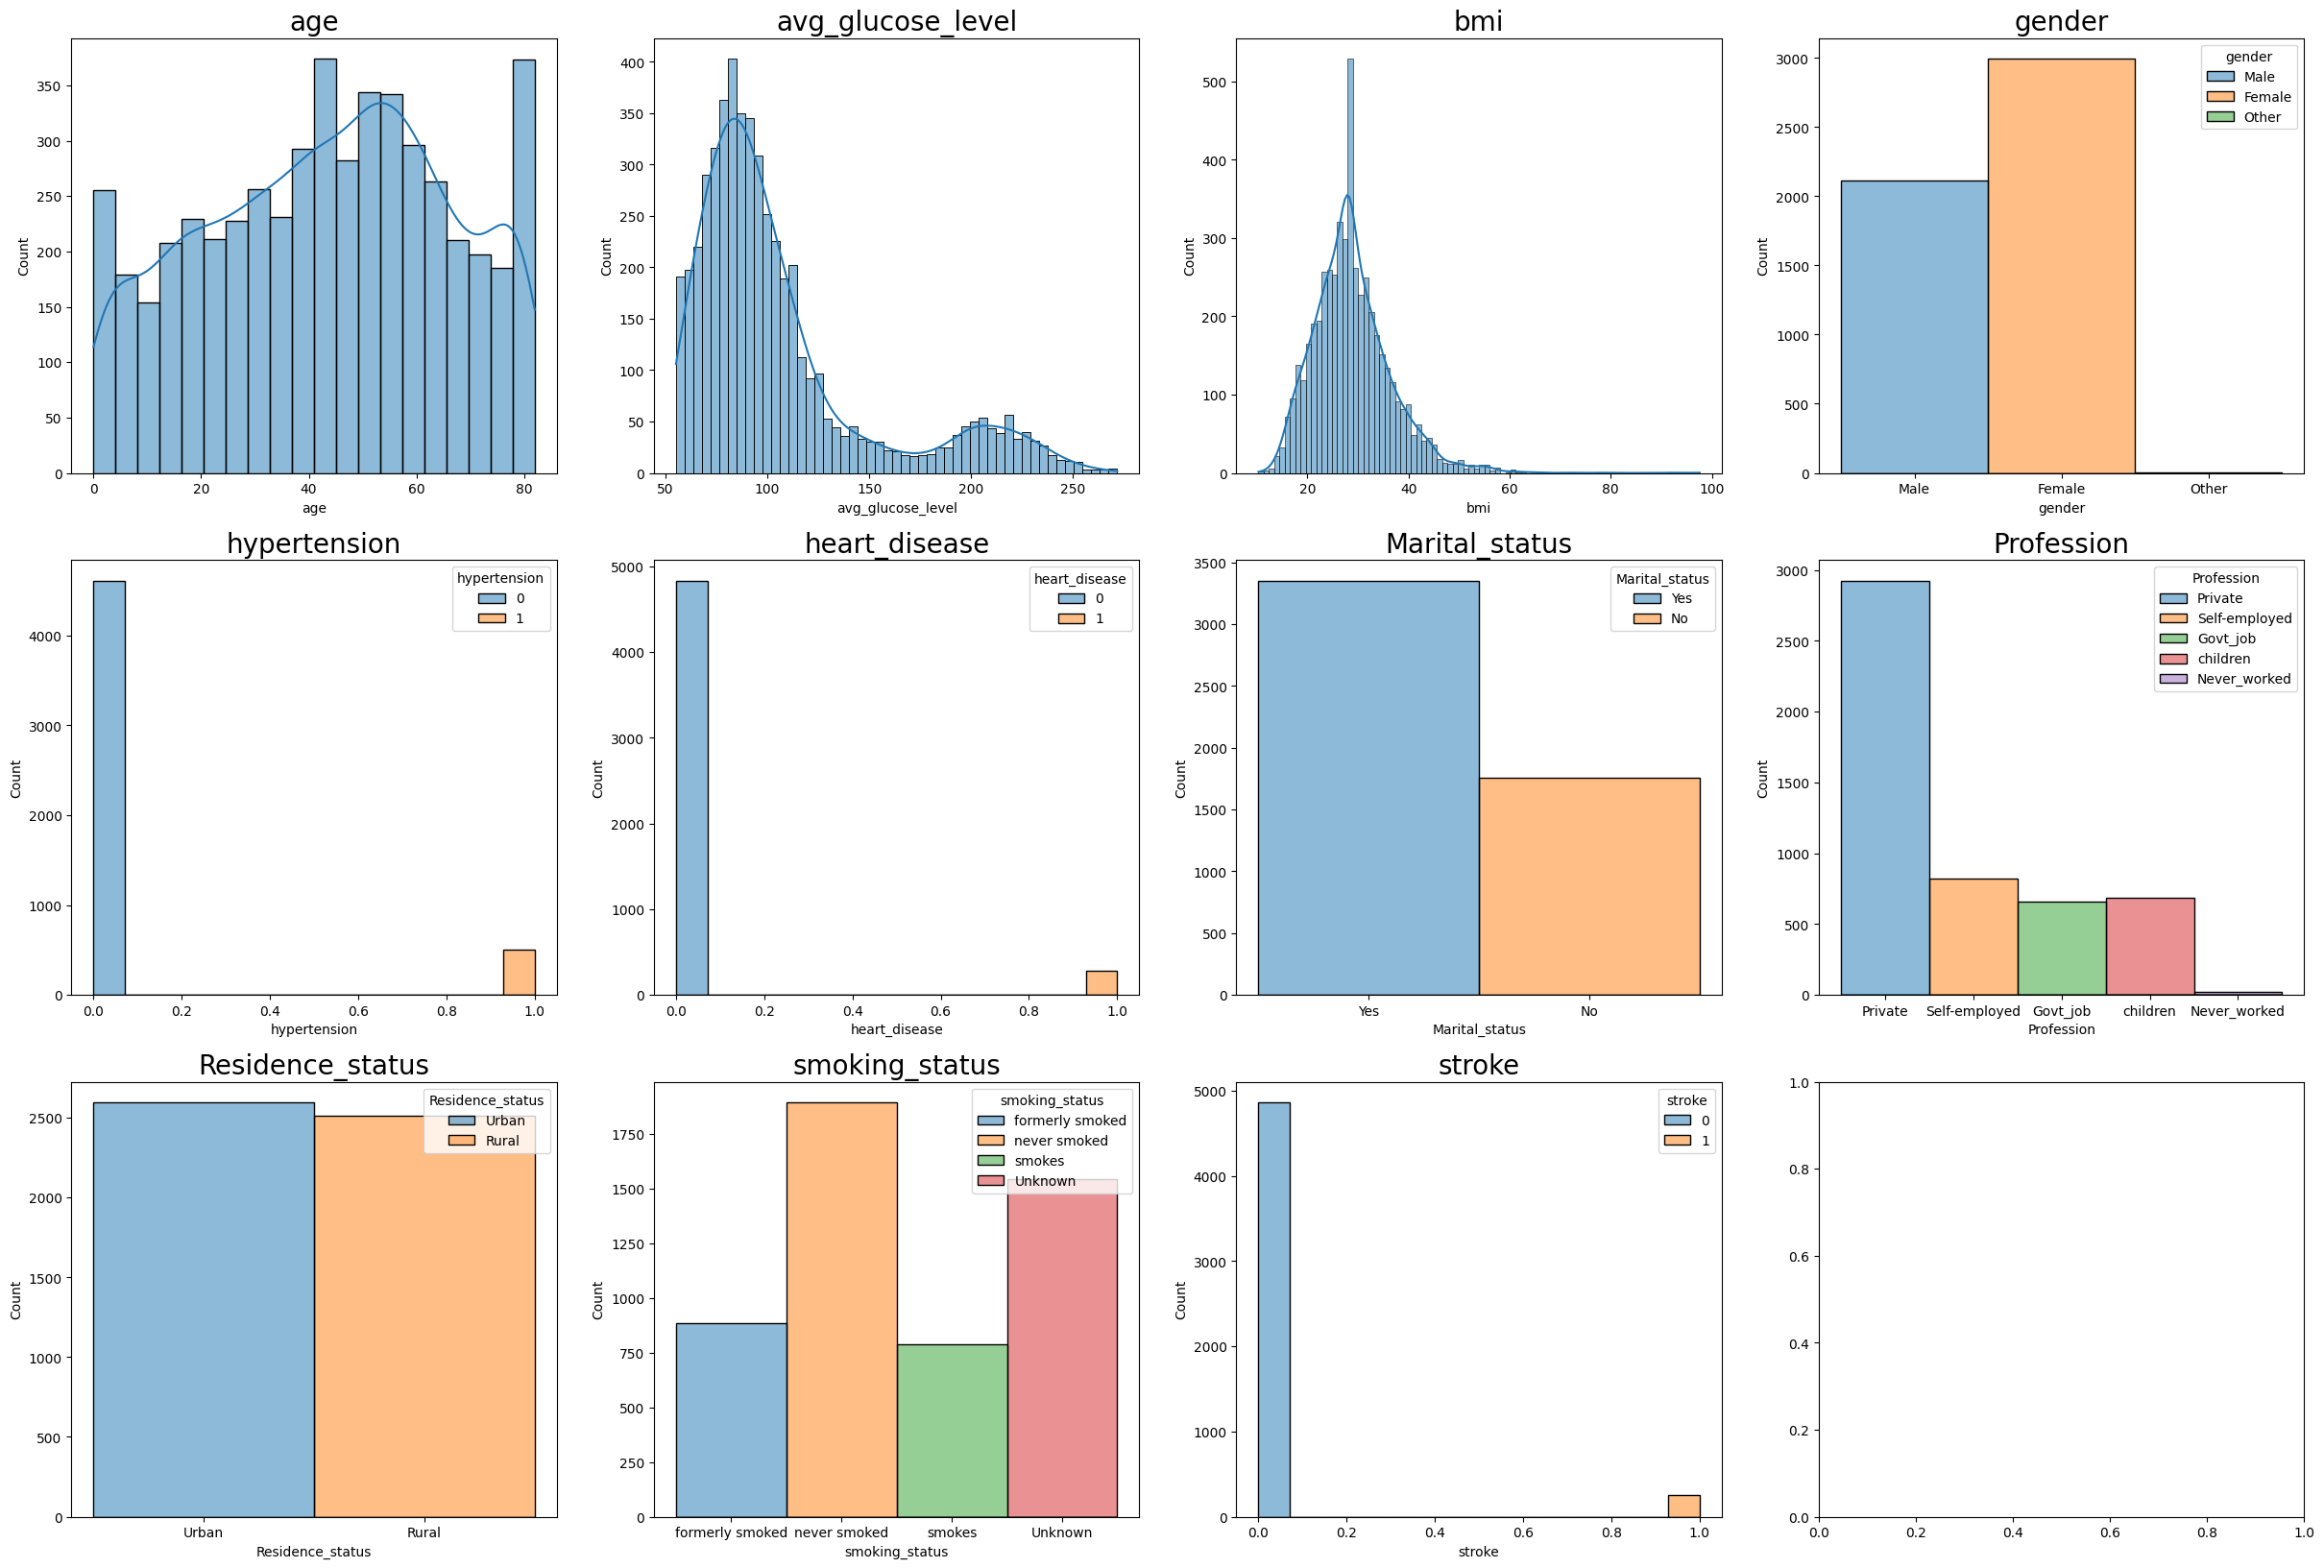

In [22]:
# Frequency plotting of each column
fig, ax= plt.subplots(3,4)
fig.set_size_inches(30,20)

columns = ['age','avg_glucose_level','bmi','gender','hypertension','heart_disease','Marital_status','Profession','Residence_status','smoking_status','stroke']
numerical_columns = ['age','avg_glucose_level','bmi']
for i, column in enumerate(columns):
    row = i//4
    col = i%4
    if column in numerical_columns:
        hist = sns.histplot(data=stroke_data,x= column,ax=ax[row,col],kde = True)
    else:
        hist = sns.histplot(data=stroke_data,x=column,ax=ax[row,col],hue=column)
    hist.set_title(column,fontsize=20)
    hist.set_xlabel(f"{columns[i]}")
    
    
plt.show()
    

1. **Age:-**Couldn't get any good insights by looking this graph
2. **Avg_Glucose_level:-**This show a poisitive skewness that indicates most of the patients have lower than average blood glucose level but there a small number of patients with high blood glucose level thats cause the curve tails to right.
3. **BMI:-**It shows bmi is normally distributed.
4. **Gender:-**It shows there are more female patient's as compare to males.
5. **Hypertention:-**It shows there is class imbalance which needs to be oversampling before modeling. it shows a strong correlation between them.
6. **Heart_disease:-**It also shows there is a imbalance.It shows a correlation between them
7. **Marital_status:-**As per the above two graph it also shows a class imbalance and need to be over sampling before modeling and it show a strong correlation between them.
8. **Profession:-**From this graph we come to know about most of the individuals are works in a private sectore then some are self employed and follwed by governments jobs and other are catagorised as childrens and then those who have never worked anywhere.
9. **Residence_status:-** It shows a balancing data between rural and urban areas.
10. **Smoking_status:-**It show most of the individuals are never smoked and there is equal number of counts in between smoker and former smokers and lastly there are so many unknown person who might be influence others.

## CORRELATION ANALYSIS

<Axes: >

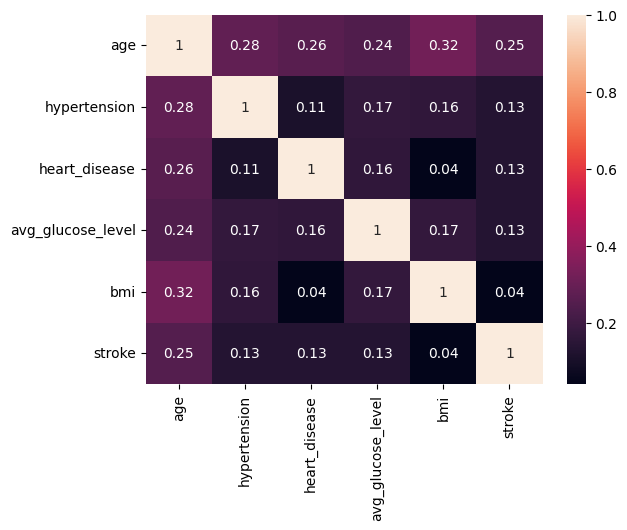

In [23]:
# checking correlation between numeric variables
df=stroke_data.drop('id',axis=1)
sns.heatmap(df.corr(numeric_only=True).round(2), annot = True)


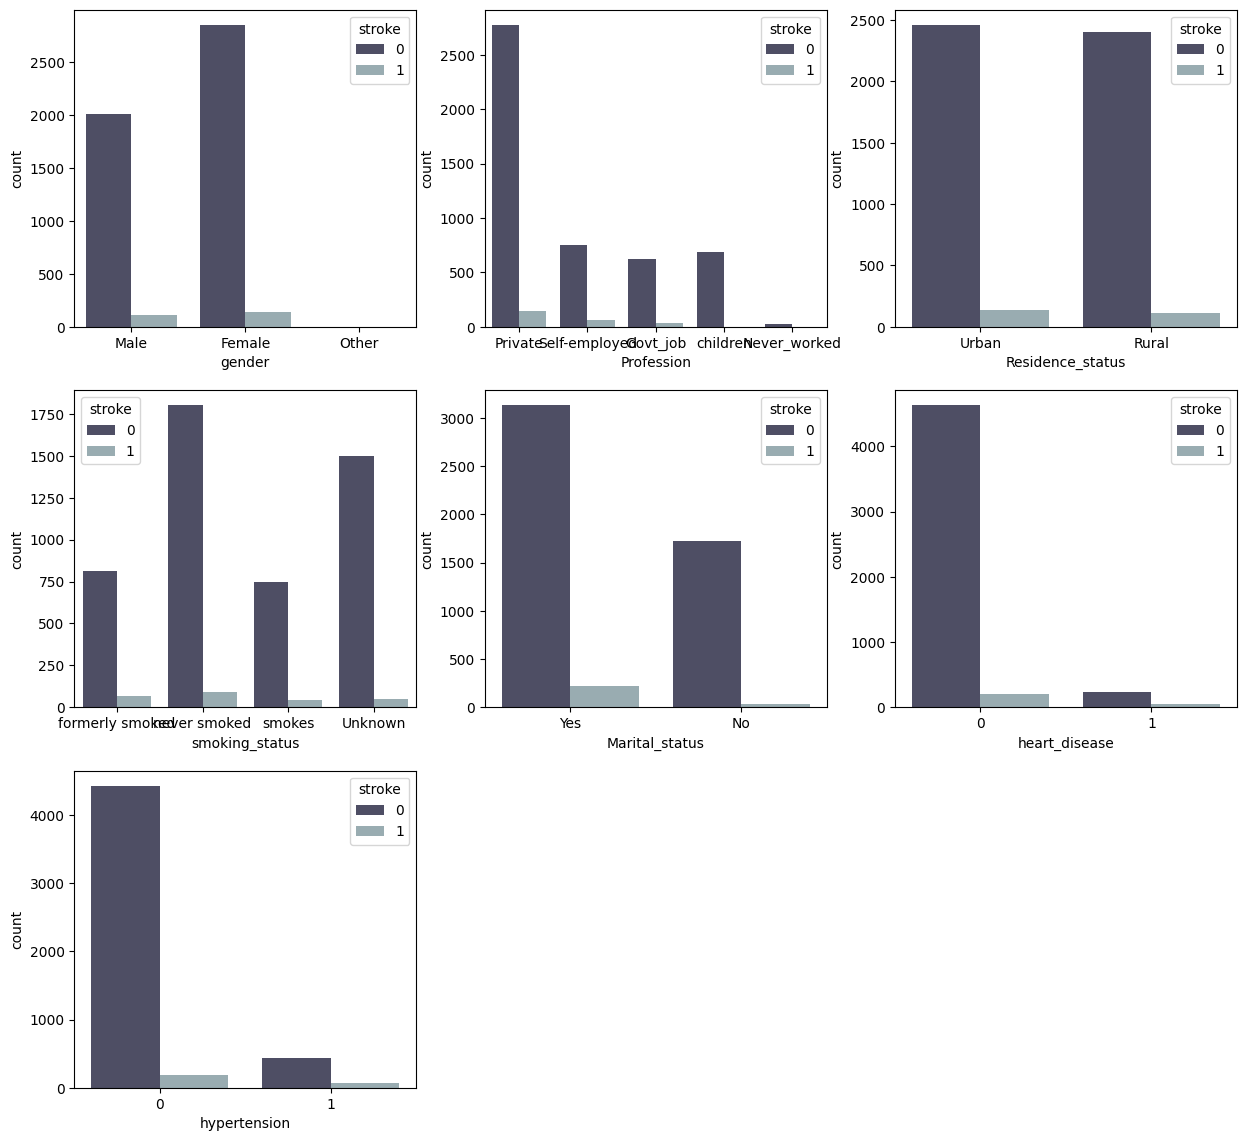

In [24]:
# columnwise count plot
columns = ['gender','Profession','Residence_status','smoking_status','Marital_status','heart_disease','hypertension']
plt.figure(figsize=(15,14))
for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    
    sns.countplot(x=stroke_data[columns[i]],hue=stroke_data['stroke'],palette='bone')
    

<Axes: xlabel='age', ylabel='bmi'>

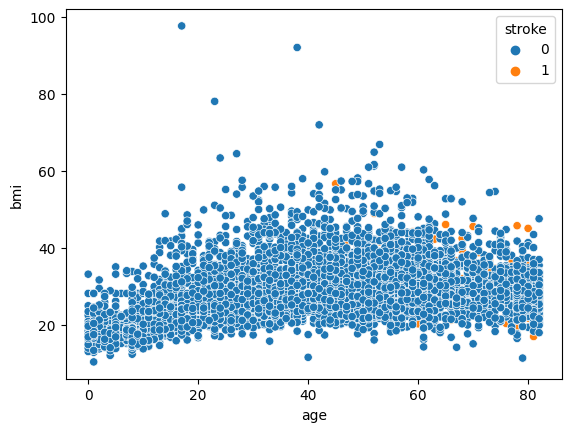

In [25]:
sns.scatterplot(data=stroke_data,x='age',y='bmi',hue='stroke')

In [26]:
stroke_data.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
Marital_status        object
Profession            object
Residence_status      object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Data Preprocessing



## Data Preparation:
  
       **No missing values in Data set, no action needed.**
        
   - Machine Learning Task:
        **Task is classification**
   **Independent variables - gender,Marital_status,Profession,Residence_status,smoking_status**
       
       **Target variable - stroke**

     - Split the dataset into training and test sets for model evaluation.


In [27]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,Marital_status,Profession,Residence_status,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [28]:
# import liabraries for machine learning task
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report
print("Setup Complete")
x = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']

Setup Complete


In [29]:
stroke_data.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
Marital_status        object
Profession            object
Residence_status      object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [30]:
# Splitting the dataset into train/test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, y_train

(         id  gender  age  hypertension  heart_disease Marital_status  \
 802    4970    Male   79             0              0            Yes   
 3927  56137  Female   62             0              0            Yes   
 2337  54590  Female   21             0              0             No   
 3910  36548    Male   31             0              0            Yes   
 1886  61171  Female   31             0              0             No   
 ...     ...     ...  ...           ...            ...            ...   
 4426  13846    Male   43             0              0            Yes   
 466    1307  Female   61             1              0            Yes   
 3092  31481  Female    1             0              0             No   
 3772  61827    Male   80             0              0            Yes   
 860   28933  Female   46             0              0            Yes   
 
          Profession Residence_status  avg_glucose_level   bmi   smoking_status  
 802   Self-employed            Rural   

In [31]:
# Define numerical and categorical columns
num_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = x.select_dtypes(include=['object']).columns.tolist()
print(num_features)
print(cat_features)

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
['gender', 'Marital_status', 'Profession', 'Residence_status', 'smoking_status']


In [32]:
 #Preprocessing pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

Preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])
print(num_transformer)
print(cat_transformer)
print(Preprocessor)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])
Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['id', 'age', 'hypertension', 'heart_disease',
                                  'avg_glucose_level', 'bmi']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'Marital_status', 'Profession',
                

In [33]:
# i want to try this models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}
print(models)

{'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(), 'Gradient Boosting': GradientBoostingClassifier(), 'SVM': SVC(probability=True)}


In [34]:
# i want try different param grid.
param_gids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'classifier__max_depth': [3, 5, 7, 10],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__max_depth': [3, 5, 7]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbour': {  # Corrected key here
        'classifier__n_neighbors': [3, 5, 7, 10],
        'classifier__metric': ['euclidean', 'manhattan']
    }
}
print(param_gids)

{'Logistic Regression': {'classifier__C': [0.1, 1, 10], 'classifier__solver': ['liblinear', 'saga']}, 'Decision Tree': {'classifier__max_depth': [3, 5, 7, 10], 'classifier__min_samples_split': [2, 5, 10]}, 'Random Forest': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [3, 5, 10], 'classifier__min_samples_split': [2, 5, 10]}, 'Gradient Boosting': {'classifier__n_estimators': [100, 200], 'classifier__learning_rate': [0.01, 0.1, 0.5], 'classifier__max_depth': [3, 5, 7]}, 'SVM': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}, 'K-Nearest Neighbour': {'classifier__n_neighbors': [3, 5, 7, 10], 'classifier__metric': ['euclidean', 'manhattan']}}


In [35]:
best_model = None
best_score = 0

# Train and tune models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Create a pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', Preprocessor),
        ('classifier', model)
    ])
    
    # Perform Grid Search Cross-Validation
    grid_search = GridSearchCV(pipeline, param_gids[model_name], cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
    grid_search.fit(x_train, y_train)
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best ROC-AUC score for {model_name}: {grid_search.best_score_}")

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__solver': 'saga'}
Best ROC-AUC score for Logistic Regression: 0.8385686187205833
Training Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'classifier__max_depth': 3, 'classifier__min_samples_split': 5}
Best ROC-AUC score for Decision Tree: 0.8116940240587386
Training Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest: {'classifier__max_depth': 3, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best ROC-AUC score for Random Forest: 0.8288928876104562
Training Gradient Boosting...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Best ROC-AUC score for Gradient Boosting: 0.8411669933890098
Training SVM...
Fitting 5 folds f

In [36]:
# Evaluate on test set
y_pred_prob = grid_search.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Test ROC-AUC for {model_name}: {roc_auc}")
    
if roc_auc > best_score:
    best_score = roc_auc
    best_model = grid_search.best_estimator_

# Final evaluation of the best model
print(f"\nBest Model: {best_model}")
y_pred_final = best_model.predict(x_test)
print(classification_report(y_test, y_pred_final))

Test ROC-AUC for SVM: 0.6481014784946236

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
    

[](http://)